# <span style="color:blue;"><u>**ESCAPE NO GAME**</u></span>


*Misha DOPRE | Alexis DUPONT | Adem BRAHIM*

# <u>Traitement du signal</u>

# <u>Livrable 1</u>

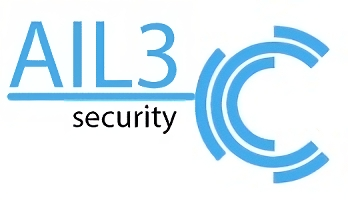




## <u>Table des matières :</u>
	
I) Contexte 

II) Problématique

III) Contraintes

IV) Solution

V) Conclusion




## <u>I) Contexte</u>

**Général :** L'agent K57, après une mission d'infiltration réussie dans une base secrète de cyberpirates, s'est retrouvé coincé dans une salle de conférence sans accès réseau. La composition des murs empêchait toute communication extérieure via les ondes traditionnelles. Le seul équipement disponible était un micro branché au système d'audioconférence, uniquement connecté au réseau lors des réunions. Notre mission au département R&D de l'agence AIL3C est de trouver une solution technique permettant à l'agent de communiquer vers l'extérieur dans de telles situations critiques. Nous devons proposer une solution innovante, basée sur les caractéristiques des ondes sonores, pour éviter que de telles situations ne se reproduisent.

**Dans ce Livrable 1 :** Nous devons proposer une solution de communication utilisant un micro dans une salle sans accès réseau.

## <u>II) Problématique</u>

Comment rendre possible la communication entre un agent et l'unité d'écoute lorsque l'agent se trouve dans une situation similaire à celle de l'agent disparu ?

## <u>III) Contraintes</u>

Uniquement un micro

Aucune onde ne rentre et sort de la pièce

Réseau uniquement disponible lorsque des gens sont situés dans la pièce

Le message doit être chiffré pour éviter qu'il soit compris immédiatement s'il est intercepté

## <u>IV) Solution</u>

## **En résumé**

Notre solution consiste à utiliser le micro de la salle de conférence pour transmettre des ultrasons modulés, inaudibles pour l'oreille humaine (+ 20 kHz). Le message sera chiffré (par exemple en code Morse) pour éviter toute interception compréhensible. L'agent utilisera son minipad pour écrire le message, le chiffrer et le convertir en ultrasons.
L'unité d'écoute reçoit le signal électrique via le réseau de la salle de conférence. L'unité d'écoute démodule le signal pour récupérer le message en code, puis le décode pour obtenir le message original.

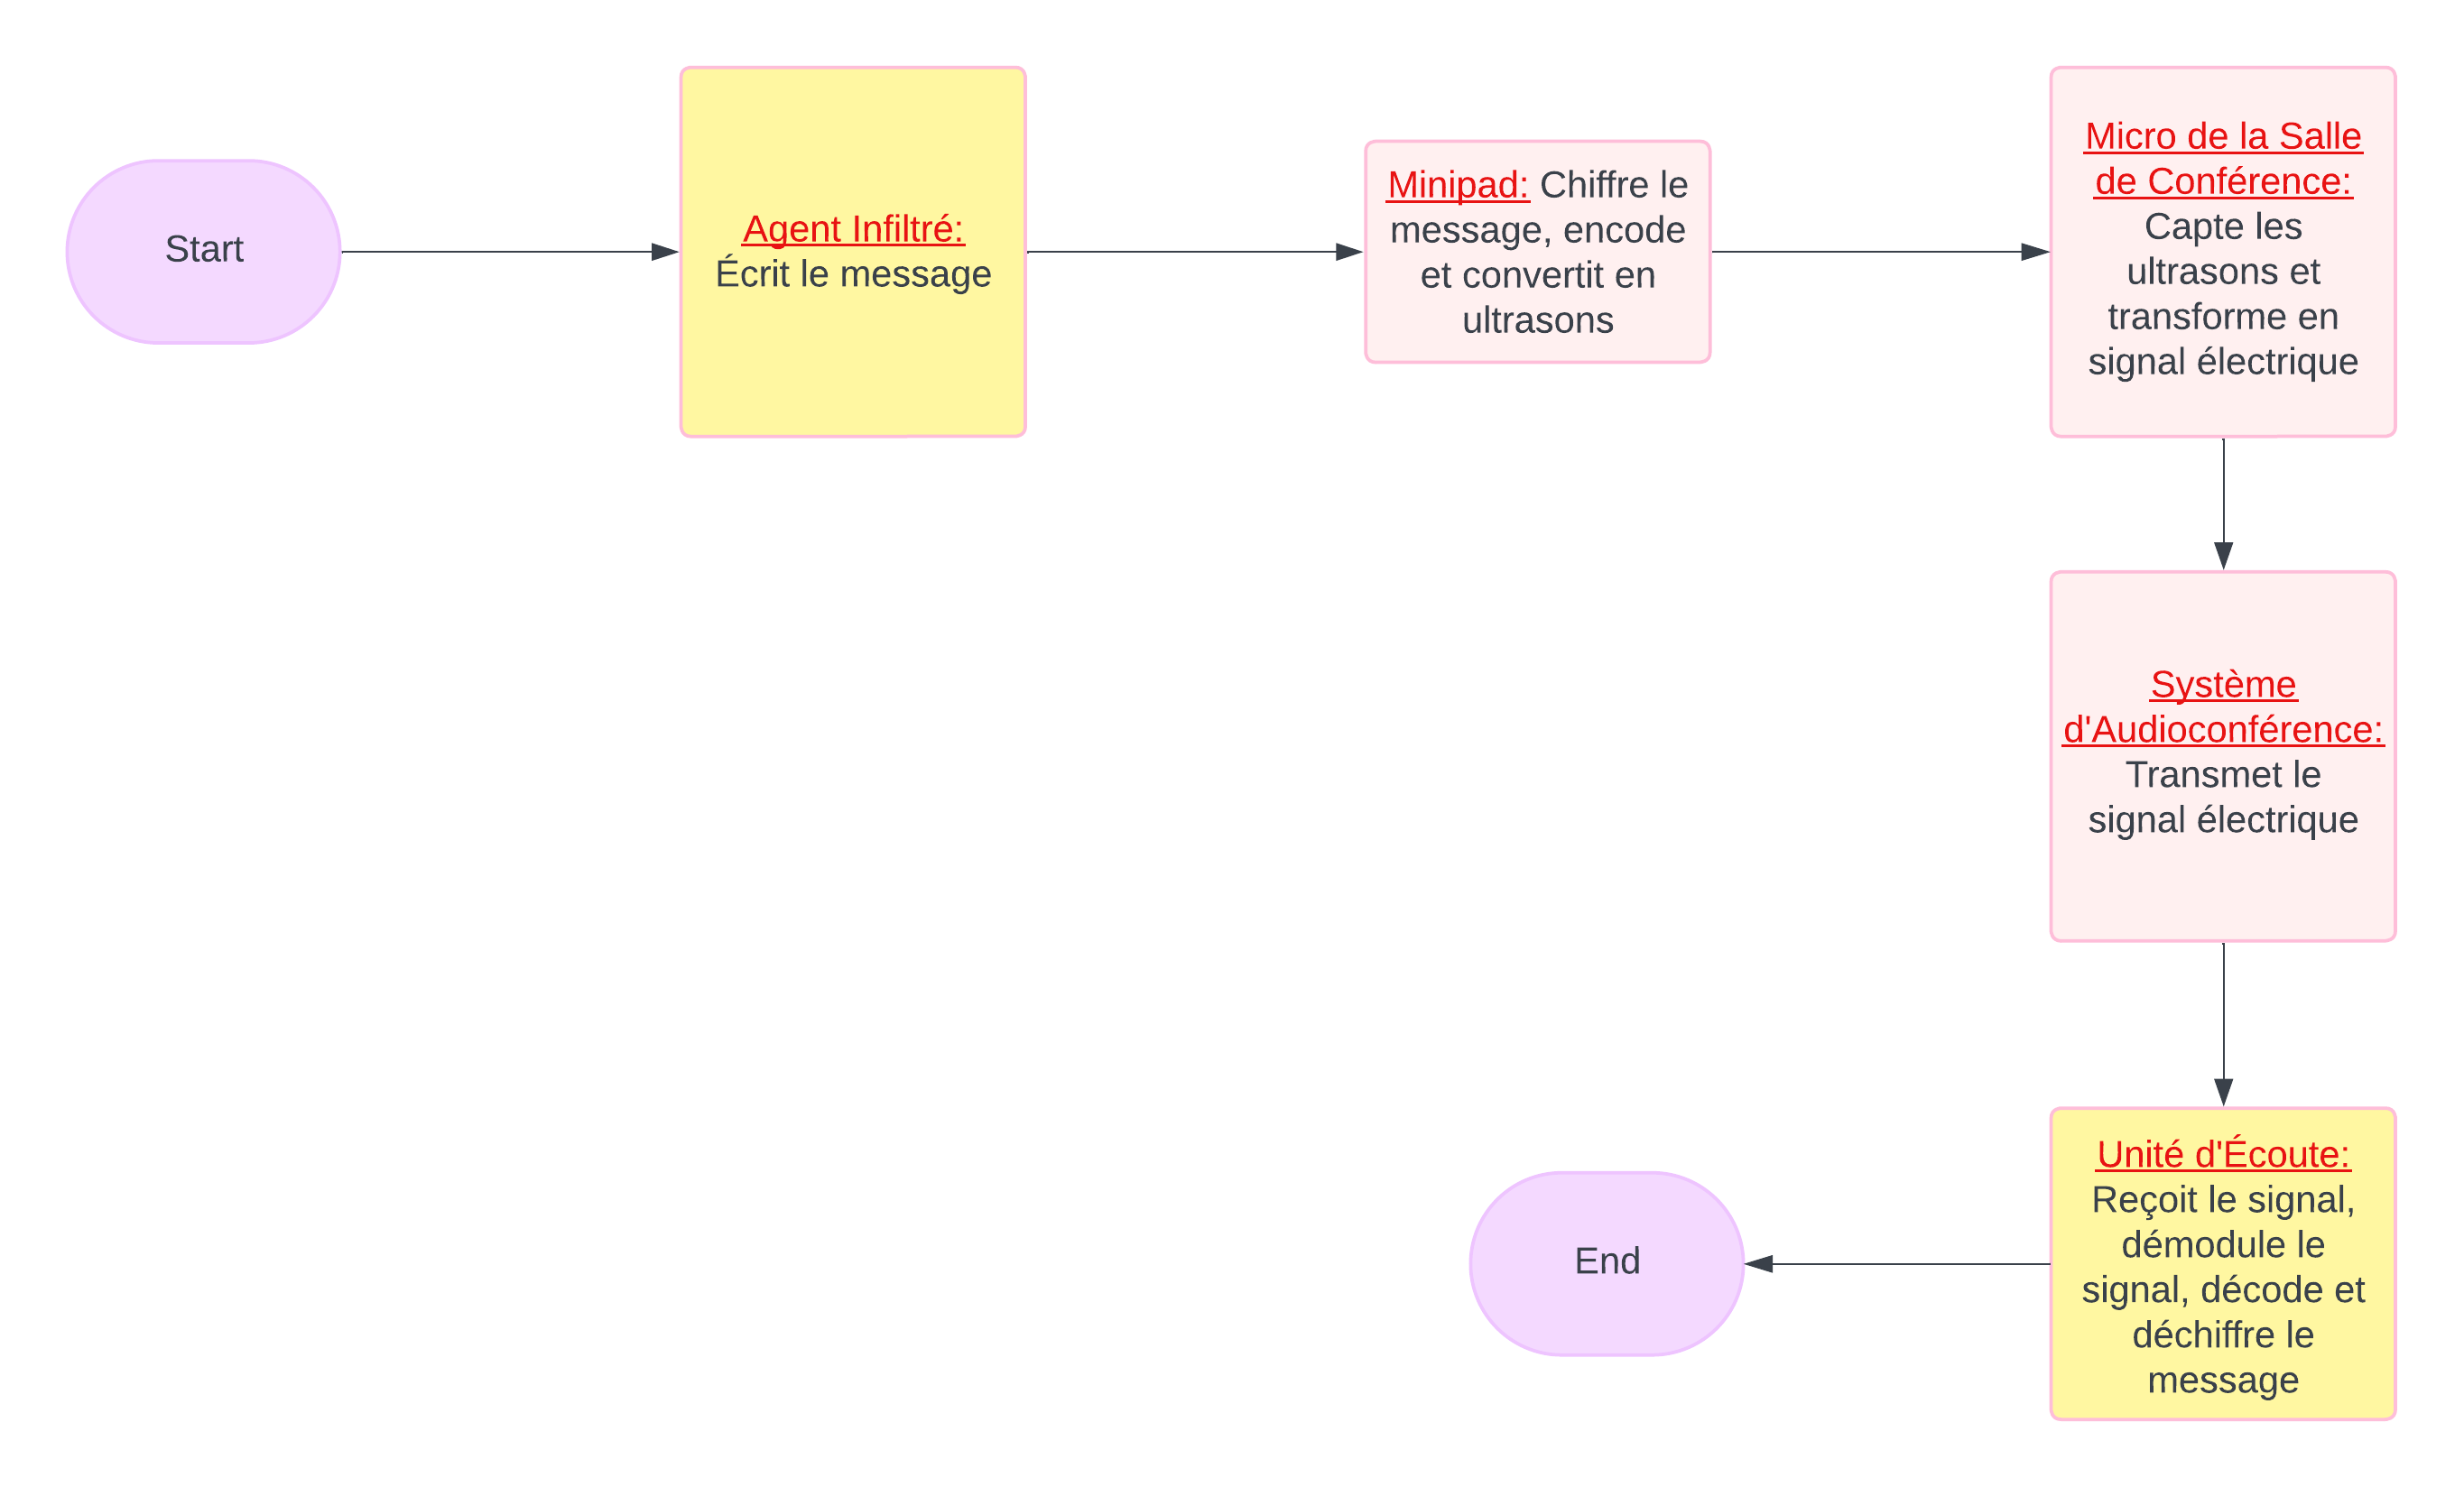

## **A) L’envoie**

L’agent rentre son message sur le minipad, ensuite il est stocké dans une nouvelle variable.


### <u>**1. La conversion du texte en binaire**</u>


Le message doit ensuite être converti en binaire pour être envoyé, avec une table ASCII.

Chaque lettre correspond à un nombre qui est converti en binaire ensuite.

**Exemple :**

Prenons le mot "HELLO" et convertissons-le en binaire en utilisant l'ASCII.


Conversion en valeurs ASCII :


'H' -> 72
'E' -> 69
'L' -> 76
'L' -> 76
'O' -> 79


Conversion en binaire :


72 -> 01001000
69 -> 01000101
76 -> 01001100
76 -> 01001100
79 -> 01001111


Donc, le mot "HELLO" en binaire ASCII est :
01001000 01000101 01001100 01001100 01001111


### <u>**2. Le chiffrement du message**</u>


Le chiffrement est nécessaire dans ce contexte pour plusieurs raisons :

**Confidentialité :** Les données transmises peuvent contenir des informations sensibles qui doivent être protégées contre les interceptions.


**Sécurité :** Le chiffrement assure que même si les données sont interceptées, elles restent incompréhensibles sans la clé de déchiffrement.


**Intégrité :** En combinaison avec le CRC, le chiffrement garantit que les données ne peuvent pas être modifiées sans être détectées.


On a plusieurs solutions de chiffrement : le code morse, le code césar, le chiffrement symétrique (AES), chiffrement asymétrique (RSA).

On retient le code morse pour sa simplicité de mise en place et l’AES pour son haut niveau de sécurité. Si possible, l’AES sera à privilégier dans notre situation. 


<u>Fonctionnement du code morse :</u>


Le code Morse est un système de communication qui encode des caractères en séquences de signaux courts (points) et longs (traits). Chaque caractère a une combinaison unique de points et de traits, permettant une transmission efficace et compréhensible même dans des conditions de faible visibilité ou de bruit élevé.


<u>Fonctionnement de l’AES : </u>


**Blocs de Données**


L'AES chiffre les données par blocs de 128 bits.
Les clés peuvent être de 128, 192 ou 256 bits, ce qui détermine le nombre de tours (rounds) de chiffrement.

**Tours de Chiffrement**

Chaque tour de chiffrement consiste en une série d'opérations mathématiques (substitution, permutation, et combinaison avec la clé).
Le nombre de tours dépend de la taille de la clé : 10 tours pour une clé de 128 bits, 12 tours pour une clé de 192 bits, et 14 tours pour une clé de 256 bits.


### <u>**3. L’encodage**</u>


Il faut ensuite encoder le message, on peut utiliser différents encodages, voici ceux qui semblent les plus adaptés : l'encodage NRZI, l'encodage Biphase (ou Manchester), l’encodage Manchester différentiel.

**L’encodage NRZI :** L'encodage NRZI est une méthode où le signal change d'état (de haut à bas ou de bas à haut) pour représenter un bit '1', et reste inchangé pour représenter un bit '0'.

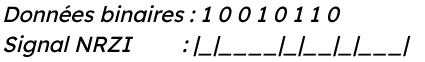


1 : Changement d'état

0 : Pas de changement d'état

**L'encodage Biphase/Manchester** est une méthode où chaque bit est représenté par une transition au milieu de la période du bit. Un bit '1' est représenté par une transition de bas à haut, et un bit '0' par une transition de haut à bas.

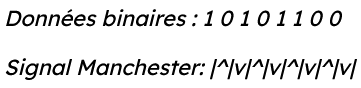

1 : Transition de bas à haut

0 : Transition de haut à bas

**L'encodage Manchester différentiel** est similaire à l'encodage Manchester, mais la transition se fait toujours au milieu de la période du bit. La différence réside dans le fait que la transition de début de bit est utilisée pour déterminer la valeur du bit. Un bit '1' est représenté par une transition différente de la précédente, et un bit '0' par une transition identique à la précédente.

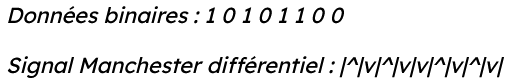

1 : Transition différente de la précédente

0 : Transition identique à la précédente

On retient ici le code Manchester pour l’instant qui semble plus approprié et plus simple à utiliser dans notre situation.


### <u>**4. Calcul du CRC**</u>


On calcule le CRC (Cyclic Redundancy Check) afin de vérifier s' il y a eu des erreurs pendant les différents processus allant de l’envoie des données à la réception des données. Cela permet d’assurer une meilleure fiabilité des informations. Une valeur, calculée à partir des données, permet de détecter des erreurs en comparant la valeur de CRC calculée à la réception avec celle envoyée. Si les valeurs ne correspondent pas, cela indique une corruption des données.


### <u>**5. La modulation**</u>


Elle permet de changer dans les caractéristiques du signal (amplitude, fréquence, phase), on l’utilise pour la transmission sur des canaux de communication.
On retient ici la modulation ASK qui semble la plus adaptée. Elle est moins sensible aux interférences et aux bruits que d’autres modulations (comme PSK ou FSK). Cette modulation semble également plus adaptée pour les systèmes de transmission utilisant des ultrasons.

Conversion des informations binaires en sons en utilisant la modulation par déplacement d'amplitude (ASK) : 

**Définir le signal porteur :**

Choisir une fréquence de signal porteur (une onde sinusoïdale) qui servira de base pour la modulation. Ici au-dessus de 20kHz afin que le son soit inaudible.


**Représenter les bits :**


Bit "1" : Lorsqu’on a un bit "1", on émet le signal porteur avec une amplitude élevée (un son fort).

Bit "0" : Lorsqu’on a un bit "0", on émet le signal porteur avec une amplitude faible (un son faible) ou pas de signal (silence).

**Générer le son :**

En fonction de la séquence de bits à transmettre, modifie l'amplitude du signal porteur pour créer une onde sonore qui représente les données binaires.


## **B) La réception**


Le signal électrique est transmis via le système d'audioconférence au réseau de la salle de conférence. L'unité d'écoute, située à l'extérieur de la salle de conférence, reçoit ce signal électrique.


### <u>**1. La démodulation**</u>


On utilise la démodulation ASK.
À la réception, le signal analogique est démodulé pour retrouver les données numériques originales. La démodulation convertit le signal reçu en une forme numérique que le récepteur peut traiter.


### <u>**2. La vérification CRC**</u>


Une fois les données démodulées, le récepteur recalcule le CRC des données reçues et le compare avec le CRC transmis. Si les deux valeurs correspondent, les données sont considérées comme intactes. Sinon, une erreur est détectée.


### <u>**3. Le décodage**</u>


On prend l’exemple du code de Manchester : 

**Réception du signal :** Le signal codé en Manchester est reçu. Ce signal est composé de transitions spécifiques qui représentent les bits 0 et 1.

**Détection des transitions :** Le récepteur détecte les transitions dans le signal. Une transition de bas à haut au milieu de l'intervalle de bit représente un 0, tandis qu'une transition de haut à bas représente un 1.

**Conversion en bits :** Les transitions détectées sont converties en bits binaires. Par exemple :
Une transition de bas à haut au milieu de l'intervalle de bit est interprétée comme un 0.
Une transition de haut à bas au milieu de l'intervalle de bit est interprétée comme un 1.

**Reconstruction des données :** Les bits binaires décodés sont assemblés pour reconstruire les données originales.

### <u>**4. Le déchiffrement du message**</u>

On déchiffre les informations après le décodage afin 

**Fonctionnement du code morse :**
Le décodage du code Morse consiste à convertir des séquences de points (.) et de traits (-) en lettres, chiffres et symboles en utilisant une table de référence. Chaque séquence correspond à un caractère spécifique. Les caractères décodés sont ensuite assemblés pour reconstruire le message original. Ce processus peut être effectué manuellement ou à l'aide de logiciels spécialisés.

**Fonctionnement de l’AES :** 

Le récepteur doit posséder la clé secrète utilisée pour le chiffrement. Cette clé est partagée de manière sécurisée entre l'émetteur et le récepteur.

Rondes de déchiffrement : L'AES utilise un certain nombre de rondes (10, 12 ou 14, selon la longueur de la clé) pour déchiffrer les données. Chaque ronde applique une série d'opérations mathématiques et de transformations pour inverser le processus de chiffrement. Ces opérations incluent :

AddRoundKey : Ajoute la clé de la ronde au bloc de données.
InvShiftRows : Inverse l'opération de décalage des lignes.
InvSubBytes : Inverse l'opération de substitution des octets.
InvMixColumns : Inverse l'opération de mélange des colonnes (sauf pour la dernière ronde).

### <u>**5. Conversion du message binaire en texte**</u>

On utilise la table ASCII, pour effectuer le processus inverse et ainsi convertir le message binaire en texte.


## <u>V) Conclusion</u>


Nous avons donc pu établir une première hypothèse afin de résoudre ce problème.
Le livrable 2 traitera de la validation des hypothèses formulées dans le livrable 1 par l'expérimentation et la mise en œuvre pratique de la solution proposée.




